In [10]:
# Introduction To The Dataset
import csv
fileStr = open("US_births_1994-2003_CDC_NCHS.csv", 'r',encoding='utf-8').read().split('\n')

print(fileStr[:10])

['year,month,date_of_month,day_of_week,births', '1994,1,1,6,8096', '1994,1,2,7,7772', '1994,1,3,1,10142', '1994,1,4,2,11248', '1994,1,5,3,11053', '1994,1,6,4,11406', '1994,1,7,5,11251', '1994,1,8,6,8653', '1994,1,9,7,7910']


In [11]:
# Converting Data Into A List Of Lists
def read_csv(fileStr):
    string_list = fileStr[1:]
    final_list = []
    for rec in string_list:# rec = '1994,1,1,6,8096'
        int_fields=[]
        string_fields = rec.split(',')# string_fields = ['1994','1','1','6','8096']
        for val in string_fields:
            int_fields.append(int(val))
        final_list.append(int_fields)
    return final_list

cdc_list=read_csv(fileStr)
cdc_list[:10]

[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498]]

In [12]:
# Calculating Number Of Births Each Month
def month_births(cdc_list):
    births_per_month = {}
    for l in cdc_list:
        if l[1] in births_per_month:
            births_per_month[l[1]]+=l[4]
        else:
            births_per_month[l[1]]=l[4]
    return births_per_month

cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [5]:
# Calculating Number Of Births Each Day Of Week
def dow_births(cdc_list):
    births_per_week = {}
    for l in cdc_list:
        if l[3] in births_per_week:
            births_per_week[l[3]]+=l[4]
        else:
            births_per_week[l[3]]=l[4]
    return births_per_week

cdc_week_births = dow_births(cdc_list)
cdc_week_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

In [19]:
# Creating A More General Function
def calc_counts(cdc_list,col):
    births = {}
    for l in cdc_list:
        if l[col] in births:
            births[l[col]]+=l[4]
        else:
            births[l[col]]=l[4]
    return births

cdc_year_births = calc_counts(cdc_list,0)
cdc_month_births = calc_counts(cdc_list,1)
cdc_dom_births = calc_counts(cdc_list,2)
cdc_dow_births = calc_counts(cdc_list,3)
cdc_dow_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

In [17]:
# Next Steps
# Write a function that can calculate the min and max values for any dictionary that's passed in.
def calc_min_max(cdc_dict):
    min_k = 0
    min_v = cdc_dict[list(cdc_dict.keys())[0]]
    max_k = 0
    max_v = cdc_dict[list(cdc_dict.keys())[0]]
    for k,v in cdc_dict.items():
        if cdc_dict[k] < min_v:
            min_v = v
            min_k = k
        if cdc_dict[k] > max_v:
            max_v = v
            max_k = k
    print("min value for ",min_k," is ", min_v)
    print("max value for ",max_k," is ", max_v)

calc_min_max(cdc_month_births)

min value for  2  is  3018140
max value for  8  is  3525858


In [27]:
# Write a function that extracts the same values across years and calculates the differences between consecutive values to 
# show if number of births is increasing or decreasing.
# For example, how did the number of births on Saturday change each year between 1994 and 2003?
def calc_yr_sat_counts(cdc_list,col):
    births = {}
    for l in cdc_list:
        if l[3]==6:
            if l[col] in births:
                births[l[col]]+=l[4]
            else:
                births[l[col]]=l[4]
    return births

cdc_yr_sat_counts = calc_yr_sat_counts(cdc_list,0)
cdc_yr_sat_counts

def chg_in_sat_birth(cdc_yr_sat_counts):
    prev_year = 0
    prev_births = 0
    curr_year = 0
    curr_births = 0
    for k,v in cdc_yr_sat_counts.items():
        curr_year = k
        curr_births = v
        if prev_births == 0:
            print("births in", curr_year, "is", curr_births)
        elif curr_births > prev_births:
            print("births in", curr_year, "increased by", curr_births - prev_births)
        elif curr_births < prev_births:
            print("births in", curr_year, "decreased by", prev_births - curr_births)
        elif curr_births == prev_births:
            print("no change in births for", curr_year, "from previous year")
        prev_year = curr_year
        prev_births = curr_births
        
chg_in_sat_birth(calc_yr_sat_counts(cdc_list,0))    

births in 1994 is  474732
births in 1995 decreased by 15152
births in 1996 decreased by 3319
births in 1997 decreased by 5421
births in 1998 increased by 2936
births in 1999 decreased by 3791
births in 2000 increased by 19809
births in 2001 decreased by 15866
births in 2002 decreased by 8158
births in 2003 increased by 1675


{1994: 474732,
 1995: 459580,
 1996: 456261,
 1997: 450840,
 1998: 453776,
 1999: 449985,
 2000: 469794,
 2001: 453928,
 2002: 445770,
 2003: 447445}

In [14]:
# Find a way to combine the CDC data with the SSA data, which you can find here. Specifically, brainstorm ways to deal with 
# the overlapping time periods in the datasets.
fileStrCDC = open("US_births_1994-2003_CDC_NCHS.csv", 'r',encoding='utf-8').read().split('\n')
fileStrSSA = open("US_births_2000-2014_SSA.csv", 'r',encoding='utf-8').read().split('\n')
cdc_ssa =  open("US_births_1994_2014.csv", "w")

# solution: merge data sets and average the overlapping time periods 2000 to 2003
cdc_ssa.write(fileStrCDC[0]+ '\n')
fileStrCDC = fileStrCDC[1:]
fileStrSSA = fileStrSSA[1:]

#write all unique cdc recs to cdc_ssa
#average births for overlapping time periods
for line1 in fileStrCDC:   
    list1 = line1.split(',')# ['1994','1','1','6','8096']
    f = False
    for line2 in fileStrSSA:
        list2 = line2.split(',')
        if list1[0] == list2[0] and list2[1] == list1[1] and list2[2] == list1[2] and list2[3] == list1[3]:
            list1[4] = str((int(list2[4])+int(list1[4]))//2)
            cdc_ssa.write(','.join(list1)+ '\n')
            f = True
            break
    if not f:
        cdc_ssa.write(','.join(list1)+ '\n')    

#write all unique ssa recs to cdc_ssa
for line2 in fileStrSSA:   
    list2 = line2.split(',')
    f = False
    for line1 in fileStrCDC:
        list1 = line1.split(',')
        if list1[0] == list2[0] and list2[1] == list1[1] and list2[2] == list1[2] and list2[3] == list1[3]:
            f = True
            break
    if not f:
        cdc_ssa.write(','.join(list2)+ '\n')        
        
cdc_ssa.close()     

# Using Pandas

In [16]:
import pandas as pd

df = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv')
df.columns

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')

In [20]:
# Calculating Number Of Births Each Month using groupby
df.groupby('month')['births'].sum()

month
1     3232517
2     3018140
3     3322069
4     3185314
5     3350907
6     3296530
7     3498783
8     3525858
9     3439698
10    3378814
11    3171647
12    3301860
Name: births, dtype: int64

In [21]:
# Calculating Number Of Births Each Day Of Week
df.groupby('day_of_week')['births'].sum()

day_of_week
1    5789166
2    6446196
3    6322855
4    6288429
5    6233657
6    4562111
7    4079723
Name: births, dtype: int64

In [22]:
# Calculating Number Of Births Each year
df.groupby('year')['births'].sum()

year
1994    3952767
1995    3899589
1996    3891494
1997    3880894
1998    3941553
1999    3959417
2000    4058814
2001    4025933
2002    4021726
2003    4089950
Name: births, dtype: int64

In [37]:
df = pd.read_csv('US_births_1994_2014.csv')
df.dtypes

year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object

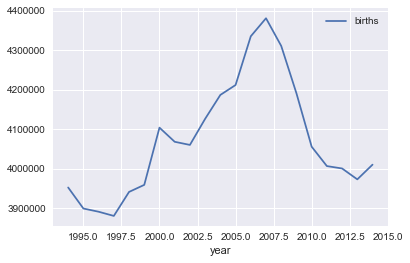

In [55]:
# plot births 
import matplotlib.pyplot as plt

%matplotlib inline

df.groupby('year')[['births']].sum().plot()
# Note: this produces a series whereas the above produces as df
#df.groupby('year')['births']

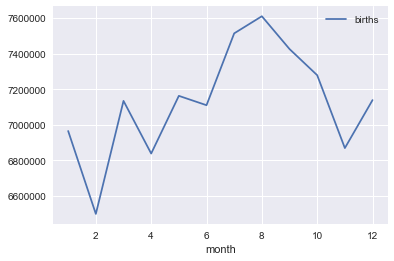

In [59]:
import numpy as np

pd.pivot_table(df,index=["month"],values=["births"],aggfunc=np.sum).plot()